# Notebook 1: Exploratory Data Analysis (EDA)

### Objective
The objective of this notebook is to perform an initial exploratory analysis of our chosen time-series dataset, the EC2 CPU utilization data from the Numenta Anomaly Benchmark (NAB). This is the foundational step in our project.

### Key Steps
1.  **Setup & Configuration**: Import necessary libraries and define paths to our data files.
2.  **Data Loading**: Load the time-series data and its corresponding anomaly labels.
3.  **Data Integration**: Merge the anomaly labels into the main DataFrame to create a unified dataset.
4.  **Visualization**: Plot the data and the anomalies to gain a clear, intuitive understanding of the problem.

### Expected Outcome
By the end of this notebook, we will have a clean DataFrame containing the time series and its anomaly flags, along with a saved visualization. This provides a solid, validated foundation for the preprocessing and modeling phases that will follow.

In [2]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (18, 6)

# --- Path Configuration ---
BASE_DIR = ".."
DATA_ROOT_DIR = os.path.join(BASE_DIR, "data/raw/NAB-master")
RESULTS_DIR = os.path.join(BASE_DIR, "results")
os.makedirs(RESULTS_DIR, exist_ok=True)

# --- Dataset Selection ---
DATASET_NAME = "realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv"
LABELS_FILE = "labels/combined_labels.json"

# --- Full Path Construction ---
data_path = os.path.join(DATA_ROOT_DIR, "data", DATASET_NAME)
label_path = os.path.join(DATA_ROOT_DIR, LABELS_FILE)

print("--- Configuration Complete ---")
print(f"Data Path: {data_path}")
print(f"Label Path: {label_path}")

--- Configuration Complete ---
Data Path: ..\data/raw/NAB-master\data\realAWSCloudwatch/ec2_cpu_utilization_24ae8d.csv
Label Path: ..\data/raw/NAB-master\labels/combined_labels.json


## Data Loading

Here, we load both the time-series data from the CSV and the anomaly labels from the JSON file. We explicitly parse the `timestamp` column into a `DatetimeIndex`, which is best practice for handling time-series data in pandas and simplifies subsequent operations.

In [3]:
df = pd.read_csv(data_path, parse_dates=['timestamp'], index_col='timestamp')

with open(label_path, 'r') as f:
    labels = json.load(f)

print("--- DataFrame Head ---")
display(df.head())

print(f"\n--- DataFrame Info ---")
df.info()

anomaly_timestamp_strings = labels.get(DATASET_NAME, [])
print(f"\n--- Anomaly Timestamps (from JSON) ---")
print(anomaly_timestamp_strings)

--- DataFrame Head ---


,value
timestamp,
2014-02-14 14:30:00,0.132
2014-02-14 14:35:00,0.134
2014-02-14 14:40:00,0.134
2014-02-14 14:45:00,0.134
2014-02-14 14:50:00,0.134



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4032 entries, 2014-02-14 14:30:00 to 2014-02-28 14:25:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4032 non-null   float64
dtypes: float64(1)
memory usage: 63.0 KB

--- Anomaly Timestamps (from JSON) ---
['2014-02-26 22:05:00', '2014-02-27 17:15:00']


## Label Integration

To create a unified dataset for analysis and modeling, we will now integrate the anomaly labels into the main DataFrame. We will create a new binary column, `is_anomaly`, where a `1` indicates a known anomaly and `0` indicates a normal data point.

In [4]:
anomaly_datetimes = pd.to_datetime(anomaly_timestamp_strings)

df['is_anomaly'] = 0

anomalies_in_df_index = df.index.intersection(anomaly_datetimes)

df.loc[anomalies_in_df_index, 'is_anomaly'] = 1

print("Value counts for the 'is_anomaly' column:")
display(df['is_anomaly'].value_counts())

Value counts for the 'is_anomaly' column:


is_anomaly
0    4030
1       2
Name: count, dtype: int64

## 3. Exploratory Visualization

This is the most critical step in our EDA. A visualization will help us intuitively understand the data and the nature of the anomalies. We will plot the entire time series and then overlay the anomaly points with a distinct marker. This plot serves as a visual confirmation that our data is loaded correctly and provides a clear target for our machine learning model.

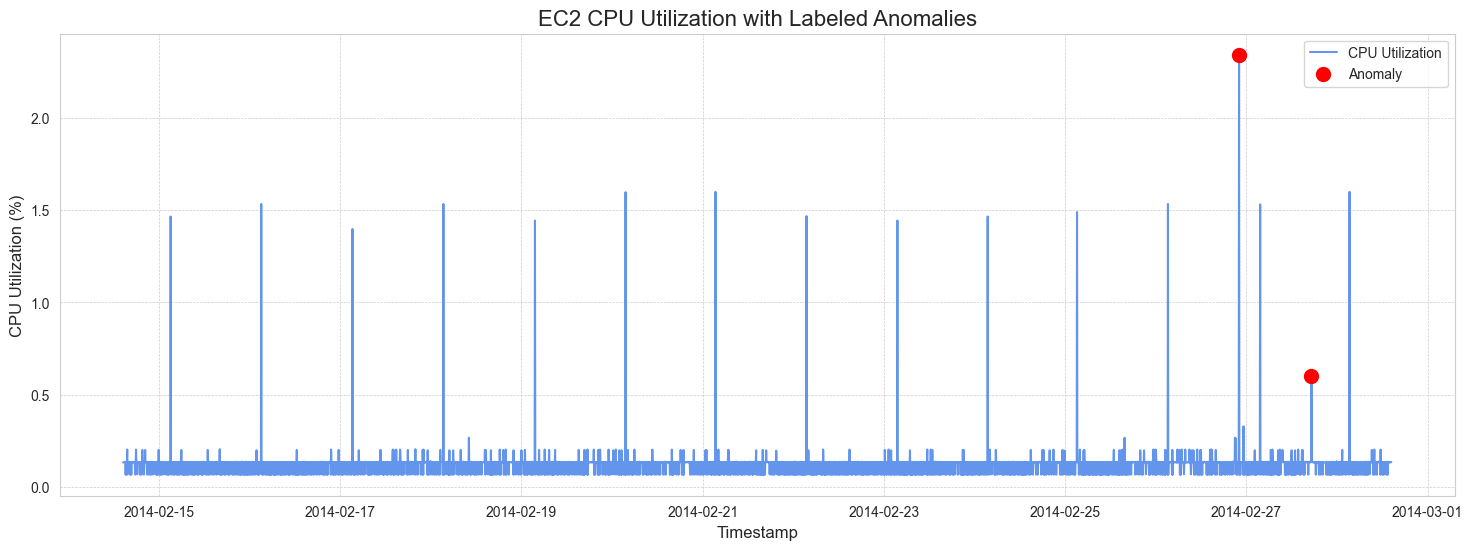

Plot saved to: ..\results\01_eda_cpu_utilization_with_anomalies.png


In [5]:
anomalies = df[df['is_anomaly'] == 1]

plt.plot(df.index, df['value'], label='CPU Utilization', color='cornflowerblue', zorder=1)
plt.scatter(anomalies.index, anomalies['value'], color='red', s=100, label='Anomaly', zorder=2)

plt.title('EC2 CPU Utilization with Labeled Anomalies', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('CPU Utilization (%)', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

output_plot_path = os.path.join(RESULTS_DIR, '01_eda_cpu_utilization_with_anomalies.png')
plt.savefig(output_plot_path)

plt.show()

print(f"Plot saved to: {output_plot_path}")